Error vs epoch graph

/Users/jusegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jusegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jusegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/jusegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iter

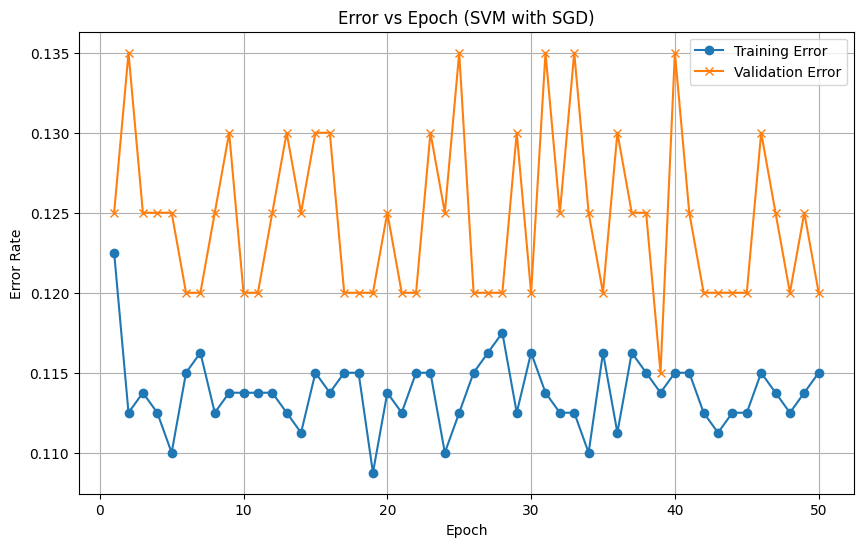

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1. Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the model
model = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

# 3. Train over multiple epochs and collect error
epochs = 50
train_errors = []
val_errors = []

for epoch in range(epochs):
    model.fit(X_train, y_train)  # Fit for one iteration due to max_iter=1 and warm_start=True

    # Predict and calculate error
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)

# 4. Plot the error vs epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, epochs + 1), val_errors, label='Validation Error', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.title('Error vs Epoch (SVM with SGD)')
plt.legend()
plt.grid(True)
plt.show()


elbow silhouette etc.

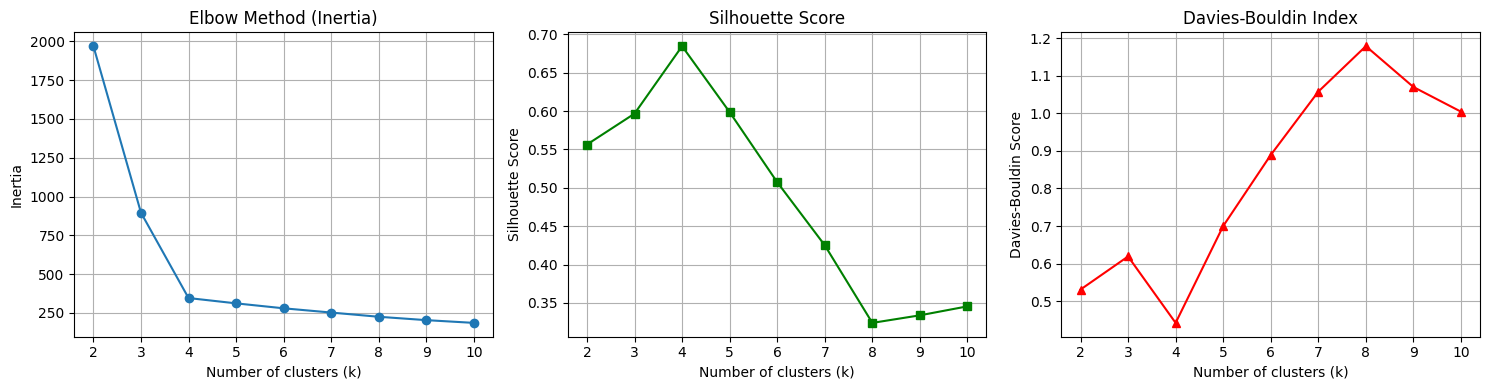

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. Generate sample data (or use your own data)
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.60, random_state=0)

# 2. Define range of clusters to try
k_values = range(2, 11)  # Trying k = 2 to 10

# 3. Lists to store metrics
inertias = []
silhouette_scores = []
davies_bouldin_scores = []

# 4. Loop over different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

# 5. Plotting

# Elbow Plot (Inertia)
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='^', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)

plt.tight_layout()
plt.show()


| Metric                   | What It Tells You                            | Best Value            |
| ------------------------ | -------------------------------------------- | --------------------- |
| **Inertia**              | Total within-cluster sum of square distances | Lower is better       |
| **Silhouette Score**     | How well-separated the clusters are          | Closer to 1 is better |
| **Davies-Bouldin Index** | Average similarity between clusters          | Lower is better       |


| Method    | Good for                              | Type       |
| --------- | ------------------------------------- | ---------- |
| **PCA**   | Preserving variance (linear)          | Linear     |
| **t-SNE** | Preserving local structure (clusters) | Non-linear |
| **UMAP**  | Preserving global + local structure   | Non-linear |
| **LDA**   | Class-separability (supervised)       | Linear     |


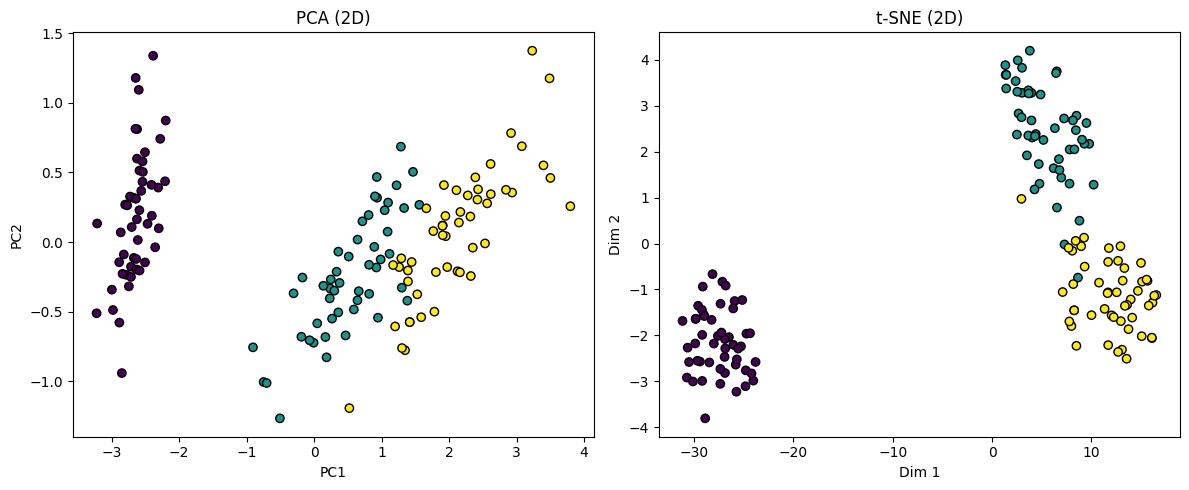

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris  # Or use your own dataset

# Load data
data = load_iris()
X = data.data
y = data.target  # optional, for color-labeling

# ---- PCA ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ---- t-SNE ----
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE (2D)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

plt.tight_layout()
plt.show()


PCA pipeline

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=50, random_state=42)

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: scale the data
    ('pca', PCA(n_components=2)),       # Step 2: reduce to 2D
    ('clf', LogisticRegression())       # Step 3: classification model
])

# 4. Train pipeline
pipeline.fit(X_train, y_train)

# 5. Predict / Evaluate
accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.78


main job

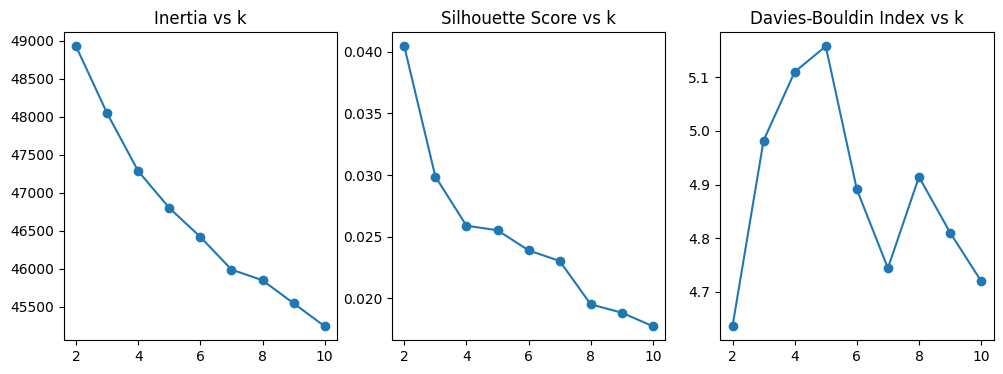

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

sil_scores = []
db_scores = []
inertias = []
ks = range(2, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(ks, inertias, marker='o')
plt.title('Inertia vs k')

plt.subplot(1,3,2)
plt.plot(ks, sil_scores, marker='o')
plt.title('Silhouette Score vs k')

plt.subplot(1,3,3)
plt.plot(ks, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')

plt.show()
